In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
def concat_df(csv_list):
    df = pd.DataFrame()
    for path in csv_list:
        df_aux = pd.read_csv(path)
        df = pd.concat([df, df_aux], ignore_index=True)
    return df

In [3]:
def rename_element(element):
    try:
        aux = element.split(".")
        return aux[1]
    except:
        return element

In [4]:
main_dir = '/home/cagui/Documents/experimentos_pesquisa/Resultados'
pastas = os.listdir(main_dir)
datasets = pastas
df_dict = dict()

for dataset in pastas:
    csvs = os.listdir(os.path.join(main_dir, dataset))
    caminho_aux1 = os.path.join(main_dir, dataset)
    caminho = [os.path.join(caminho_aux1, csv) for csv in csvs]
    df = concat_df(caminho)
    df_dict[dataset] = df

In [5]:
# refazendo a coluna de algoritmos

for dataframe in df_dict:
    if len(df_dict[dataframe]) != 0:
        df_dict[dataframe]['Algoritmo'] = df_dict[dataframe]['Algoritmo'].apply(rename_element)

In [6]:
df_dict['citeseer']['Algoritmo'].unique()

array(['MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4',
       'RCSVM_RN', 'PU_LP', 'CCRNE', 'LP_PUL'], dtype=object)

In [7]:
datasets = os.listdir('/home/cagui/Documents/experimentos_pesquisa/Resultados')
algoritmos = df_dict['citeseer']['Algoritmo'].unique()
rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25]

In [8]:
df_algoritmos = list()
df_rate = list()
df_acc = list()
df_acc_std = list()
df_f1 = list()
df_f1_std = list()
df_dataset = list()


for dataframe in df_dict:
    for rate in rates:
        for algorithm in algoritmos:
            try:
                # fazer o slice para cada rate e pra cada dataset, criar um dicionario pra armazenar e transformar em df
                slice = df_dict[dataframe][(df_dict[dataframe]['Algoritmo'] == algorithm) & (df_dict[dataframe]['Rate'] == rate)]
                df_algoritmos.append(slice.iloc[0,0])
                df_rate.append(rate)
                df_acc.append(slice['acc'].mean())
                df_acc_std.append(slice['acc'].std())
                df_f1.append(slice['f1'].mean())
                df_f1_std.append(slice['f1'].std())
                df_dataset.append(dataframe)
            except:
                pass

final_df = pd.DataFrame({'algoritmo' : df_algoritmos, 'rate' : df_rate, 'acc' : df_acc, 'acc_std' : df_f1_std, 'f1' : df_f1, 'f1_std' : df_f1_std, 'dataset' : df_dataset})

In [9]:
algoritmos

array(['MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4',
       'RCSVM_RN', 'PU_LP', 'CCRNE', 'LP_PUL'], dtype=object)

In [10]:
#transformando a coluna em uma tabela latex

versao_tabela = final_df[(final_df['dataset'] == 'cora')].round(3)
versao_tabela = versao_tabela[['algoritmo', 'f1', 'f1_std', 'rate']]
versao_tabela['f1_final'] = versao_tabela.apply(lambda row: f"{row['f1']} ± {row['f1_std']}", axis = 1)
versao_tabela = versao_tabela[['algoritmo', 'f1_final', 'rate']]
versao_tabela_pivoted = versao_tabela.pivot(index = 'rate', columns = 'algoritmo', values = 'f1_final').reset_index()
versao_tabela_pivoted.columns.name = None

# versao_tabela_pivoted.reset_index(drop = True)
versao_tabela_pivoted = versao_tabela_pivoted.set_index('rate')
versao_tabela_pivoted


,AE_PUL,CCRNE,GAE_PUL1,GAE_PUL2,GAE_PUL3,GAE_PUL4,LP_PUL,MCLS,PU_LP,RCSVM_RN
rate,,,,,,,,,,
0.01,0.957 ± 0.012,0.9 ± 0.026,0.864 ± 0.006,0.954 ± 0.014,0.864 ± 0.008,0.947 ± 0.012,0.959 ± 0.008,0.939 ± 0.015,0.877 ± 0.001,0.877 ± 0.001
0.02,0.961 ± 0.014,0.895 ± 0.025,0.844 ± 0.013,0.96 ± 0.014,0.839 ± 0.005,0.951 ± 0.019,0.958 ± 0.007,0.943 ± 0.02,0.877 ± 0.002,0.877 ± 0.001
0.03,0.963 ± 0.011,0.904 ± 0.025,0.829 ± 0.01,0.958 ± 0.009,0.822 ± 0.01,0.954 ± 0.014,0.963 ± 0.005,0.953 ± 0.017,0.881 ± 0.004,0.879 ± 0.002
0.04,0.967 ± 0.012,0.902 ± 0.028,0.832 ± 0.005,0.965 ± 0.01,0.827 ± 0.005,0.962 ± 0.016,0.961 ± 0.004,0.94 ± 0.015,0.878 ± 0.003,0.879 ± 0.004
0.05,0.964 ± 0.011,0.904 ± 0.024,0.843 ± 0.013,0.963 ± 0.013,0.84 ± 0.011,0.966 ± 0.015,0.96 ± 0.005,0.943 ± 0.012,0.883 ± 0.005,0.88 ± 0.004
0.10,0.97 ± 0.01,0.906 ± 0.023,0.898 ± 0.02,0.972 ± 0.009,0.897 ± 0.022,0.97 ± 0.01,0.96 ± 0.006,0.948 ± 0.011,0.89 ± 0.005,0.889 ± 0.006
0.15,0.972 ± 0.007,0.91 ± 0.025,0.956 ± 0.01,0.97 ± 0.012,0.955 ± 0.01,0.973 ± 0.007,0.965 ± 0.004,0.941 ± 0.013,0.894 ± 0.008,0.896 ± 0.007
0.20,0.977 ± 0.006,0.917 ± 0.024,0.983 ± 0.005,0.968 ± 0.008,0.982 ± 0.006,0.977 ± 0.005,0.965 ± 0.004,0.932 ± 0.011,0.896 ± 0.005,0.898 ± 0.009
0.25,0.98 ± 0.006,0.923 ± 0.021,0.991 ± 0.003,0.976 ± 0.008,0.991 ± 0.003,0.974 ± 0.008,0.968 ± 0.004,0.945 ± 0.014,0.908 ± 0.004,0.903 ± 0.01


In [11]:
versao_tabela_pivoted_literatura = versao_tabela_pivoted[['MCLS', 'RCSVM_RN', 'CCRNE', 'PU_LP', 'LP_PUL']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_literatura, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & MCLS          & RCSVM_RN      & CCRNE         & PU_LP         & LP_PUL        \\
\hline
   0.01 & 0.939 ± 0.015 & 0.877 ± 0.001 & 0.9 ± 0.026   & 0.877 ± 0.001 & 0.959 ± 0.008 \\
   0.02 & 0.943 ± 0.02  & 0.877 ± 0.001 & 0.895 ± 0.025 & 0.877 ± 0.002 & 0.958 ± 0.007 \\
   0.03 & 0.953 ± 0.017 & 0.879 ± 0.002 & 0.904 ± 0.025 & 0.881 ± 0.004 & 0.963 ± 0.005 \\
   0.04 & 0.94 ± 0.015  & 0.879 ± 0.004 & 0.902 ± 0.028 & 0.878 ± 0.003 & 0.961 ± 0.004 \\
   0.05 & 0.943 ± 0.012 & 0.88 ± 0.004  & 0.904 ± 0.024 & 0.883 ± 0.005 & 0.96 ± 0.005  \\
   0.1  & 0.948 ± 0.011 & 0.889 ± 0.006 & 0.906 ± 0.023 & 0.89 ± 0.005  & 0.96 ± 0.006  \\
   0.15 & 0.941 ± 0.013 & 0.896 ± 0.007 & 0.91 ± 0.025  & 0.894 ± 0.008 & 0.965 ± 0.004 \\
   0.2  & 0.932 ± 0.011 & 0.898 ± 0.009 & 0.917 ± 0.024 & 0.896 ± 0.005 & 0.965 ± 0.004 \\
   0.25 & 0.945 ± 0.014 & 0.903 ± 0.01  & 0.923 ± 0.021 & 0.908 ± 0.004 & 0.968 ± 0.004 \\
\hline
\end{tabular}


In [12]:
versao_tabela_pivoted_proposto = versao_tabela_pivoted[['AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_proposto, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & AE_PUL        & GAE_PUL1      & GAE_PUL2      & GAE_PUL3      & GAE_PUL4      \\
\hline
   0.01 & 0.957 ± 0.012 & 0.864 ± 0.006 & 0.954 ± 0.014 & 0.864 ± 0.008 & 0.947 ± 0.012 \\
   0.02 & 0.961 ± 0.014 & 0.844 ± 0.013 & 0.96 ± 0.014  & 0.839 ± 0.005 & 0.951 ± 0.019 \\
   0.03 & 0.963 ± 0.011 & 0.829 ± 0.01  & 0.958 ± 0.009 & 0.822 ± 0.01  & 0.954 ± 0.014 \\
   0.04 & 0.967 ± 0.012 & 0.832 ± 0.005 & 0.965 ± 0.01  & 0.827 ± 0.005 & 0.962 ± 0.016 \\
   0.05 & 0.964 ± 0.011 & 0.843 ± 0.013 & 0.963 ± 0.013 & 0.84 ± 0.011  & 0.966 ± 0.015 \\
   0.1  & 0.97 ± 0.01   & 0.898 ± 0.02  & 0.972 ± 0.009 & 0.897 ± 0.022 & 0.97 ± 0.01   \\
   0.15 & 0.972 ± 0.007 & 0.956 ± 0.01  & 0.97 ± 0.012  & 0.955 ± 0.01  & 0.973 ± 0.007 \\
   0.2  & 0.977 ± 0.006 & 0.983 ± 0.005 & 0.968 ± 0.008 & 0.982 ± 0.006 & 0.977 ± 0.005 \\
   0.25 & 0.98 ± 0.006  & 0.991 ± 0.003 & 0.976 ± 0.008 & 0.991 ± 0.003 & 0.974 ± 0.008 \\
\hline
\end{tabular}


In [13]:
#transformando a coluna em uma tabela latex

versao_tabela = final_df[(final_df['dataset'] == 'citeseer')].round(3)
versao_tabela = versao_tabela[['algoritmo', 'f1', 'f1_std', 'rate']]
versao_tabela['f1_final'] = versao_tabela.apply(lambda row: f"{row['f1']} ± {row['f1_std']}", axis = 1)
versao_tabela = versao_tabela[['algoritmo', 'f1_final', 'rate']]
versao_tabela_pivoted = versao_tabela.pivot(index = 'rate', columns = 'algoritmo', values = 'f1_final').reset_index()
versao_tabela_pivoted.columns.name = None

# versao_tabela_pivoted.reset_index(drop = True)
versao_tabela_pivoted = versao_tabela_pivoted.set_index('rate')
versao_tabela_pivoted


,AE_PUL,CCRNE,GAE_PUL1,GAE_PUL2,GAE_PUL3,GAE_PUL4,LP_PUL,MCLS,PU_LP,RCSVM_RN
rate,,,,,,,,,,
0.01,0.946 ± 0.017,0.876 ± 0.017,0.863 ± 0.007,0.944 ± 0.023,0.862 ± 0.006,0.946 ± 0.019,0.951 ± 0.008,0.938 ± 0.021,0.877 ± 0.001,0.876 ± 0.0
0.02,0.964 ± 0.013,0.862 ± 0.02,0.855 ± 0.009,0.956 ± 0.011,0.853 ± 0.008,0.95 ± 0.012,0.957 ± 0.007,0.947 ± 0.009,0.877 ± 0.001,0.877 ± 0.001
0.03,0.96 ± 0.016,0.877 ± 0.02,0.863 ± 0.004,0.954 ± 0.014,0.86 ± 0.006,0.947 ± 0.014,0.958 ± 0.004,0.942 ± 0.013,0.878 ± 0.002,0.878 ± 0.004
0.04,0.959 ± 0.015,0.876 ± 0.014,0.876 ± 0.008,0.951 ± 0.018,0.873 ± 0.005,0.955 ± 0.017,0.957 ± 0.005,0.943 ± 0.007,0.88 ± 0.004,0.881 ± 0.004
0.05,0.969 ± 0.006,0.891 ± 0.021,0.888 ± 0.015,0.958 ± 0.012,0.887 ± 0.013,0.96 ± 0.009,0.959 ± 0.005,0.944 ± 0.014,0.88 ± 0.003,0.879 ± 0.003
0.10,0.972 ± 0.011,0.896 ± 0.016,0.928 ± 0.014,0.967 ± 0.006,0.925 ± 0.015,0.97 ± 0.009,0.963 ± 0.004,0.938 ± 0.017,0.888 ± 0.005,0.89 ± 0.005
0.15,0.969 ± 0.006,0.904 ± 0.018,0.975 ± 0.008,0.963 ± 0.017,0.974 ± 0.008,0.974 ± 0.007,0.963 ± 0.006,0.934 ± 0.014,0.89 ± 0.004,0.892 ± 0.009
0.20,0.977 ± 0.007,0.913 ± 0.033,0.993 ± 0.007,0.973 ± 0.006,0.993 ± 0.007,0.967 ± 0.008,0.966 ± 0.004,0.938 ± 0.009,0.899 ± 0.009,0.897 ± 0.01
0.25,0.98 ± 0.007,0.905 ± 0.016,1.0 ± 0.0,0.978 ± 0.01,1.0 ± 0.0,0.978 ± 0.008,0.968 ± 0.005,0.939 ± 0.006,0.906 ± 0.007,0.909 ± 0.008


In [14]:
versao_tabela_pivoted_literatura = versao_tabela_pivoted[['MCLS', 'RCSVM_RN', 'CCRNE', 'PU_LP', 'LP_PUL']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_literatura, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & MCLS          & RCSVM_RN      & CCRNE         & PU_LP         & LP_PUL        \\
\hline
   0.01 & 0.938 ± 0.021 & 0.876 ± 0.0   & 0.876 ± 0.017 & 0.877 ± 0.001 & 0.951 ± 0.008 \\
   0.02 & 0.947 ± 0.009 & 0.877 ± 0.001 & 0.862 ± 0.02  & 0.877 ± 0.001 & 0.957 ± 0.007 \\
   0.03 & 0.942 ± 0.013 & 0.878 ± 0.004 & 0.877 ± 0.02  & 0.878 ± 0.002 & 0.958 ± 0.004 \\
   0.04 & 0.943 ± 0.007 & 0.881 ± 0.004 & 0.876 ± 0.014 & 0.88 ± 0.004  & 0.957 ± 0.005 \\
   0.05 & 0.944 ± 0.014 & 0.879 ± 0.003 & 0.891 ± 0.021 & 0.88 ± 0.003  & 0.959 ± 0.005 \\
   0.1  & 0.938 ± 0.017 & 0.89 ± 0.005  & 0.896 ± 0.016 & 0.888 ± 0.005 & 0.963 ± 0.004 \\
   0.15 & 0.934 ± 0.014 & 0.892 ± 0.009 & 0.904 ± 0.018 & 0.89 ± 0.004  & 0.963 ± 0.006 \\
   0.2  & 0.938 ± 0.009 & 0.897 ± 0.01  & 0.913 ± 0.033 & 0.899 ± 0.009 & 0.966 ± 0.004 \\
   0.25 & 0.939 ± 0.006 & 0.909 ± 0.008 & 0.905 ± 0.016 & 0.906 ± 0.007 & 0.968 ± 0.005 \\
\hline
\end{tabular}


In [15]:
versao_tabela_pivoted_proposto = versao_tabela_pivoted[['AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_proposto, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & AE_PUL        & GAE_PUL1      & GAE_PUL2      & GAE_PUL3      & GAE_PUL4      \\
\hline
   0.01 & 0.946 ± 0.017 & 0.863 ± 0.007 & 0.944 ± 0.023 & 0.862 ± 0.006 & 0.946 ± 0.019 \\
   0.02 & 0.964 ± 0.013 & 0.855 ± 0.009 & 0.956 ± 0.011 & 0.853 ± 0.008 & 0.95 ± 0.012  \\
   0.03 & 0.96 ± 0.016  & 0.863 ± 0.004 & 0.954 ± 0.014 & 0.86 ± 0.006  & 0.947 ± 0.014 \\
   0.04 & 0.959 ± 0.015 & 0.876 ± 0.008 & 0.951 ± 0.018 & 0.873 ± 0.005 & 0.955 ± 0.017 \\
   0.05 & 0.969 ± 0.006 & 0.888 ± 0.015 & 0.958 ± 0.012 & 0.887 ± 0.013 & 0.96 ± 0.009  \\
   0.1  & 0.972 ± 0.011 & 0.928 ± 0.014 & 0.967 ± 0.006 & 0.925 ± 0.015 & 0.97 ± 0.009  \\
   0.15 & 0.969 ± 0.006 & 0.975 ± 0.008 & 0.963 ± 0.017 & 0.974 ± 0.008 & 0.974 ± 0.007 \\
   0.2  & 0.977 ± 0.007 & 0.993 ± 0.007 & 0.973 ± 0.006 & 0.993 ± 0.007 & 0.967 ± 0.008 \\
   0.25 & 0.98 ± 0.007  & 1.0 ± 0.0     & 0.978 ± 0.01  & 1.0 ± 0.0     & 0.978 ± 0.008 \\
\hline
\end{tabular}


In [16]:
#transformando a coluna em uma tabela latex

versao_tabela = final_df[(final_df['dataset'] == 'ionosphere')].round(3)
versao_tabela = versao_tabela[['algoritmo', 'f1', 'f1_std', 'rate']]
versao_tabela['f1_final'] = versao_tabela.apply(lambda row: f"{row['f1']} ± {row['f1_std']}", axis = 1)
versao_tabela = versao_tabela[['algoritmo', 'f1_final', 'rate']]
versao_tabela_pivoted = versao_tabela.pivot(index = 'rate', columns = 'algoritmo', values = 'f1_final').reset_index()
versao_tabela_pivoted.columns.name = None

# versao_tabela_pivoted.reset_index(drop = True)
versao_tabela_pivoted = versao_tabela_pivoted.set_index('rate')
versao_tabela_pivoted


,AE_PUL,CCRNE,GAE_PUL1,GAE_PUL2,GAE_PUL3,GAE_PUL4,LP_PUL,MCLS,PU_LP,RCSVM_RN
rate,,,,,,,,,,
0.01,0.89 ± 0.014,0.677 ± 0.03,0.891 ± 0.015,0.889 ± 0.012,0.89 ± 0.016,0.885 ± 0.013,0.261 ± 0.124,0.749 ± 0.138,0.667 ± 0.0,0.668 ± 0.006
0.02,0.89 ± 0.007,0.698 ± 0.093,0.896 ± 0.021,0.888 ± 0.011,0.891 ± 0.014,0.89 ± 0.018,0.215 ± 0.131,0.746 ± 0.198,0.668 ± 0.006,0.679 ± 0.008
0.03,0.89 ± 0.012,0.695 ± 0.048,0.889 ± 0.008,0.884 ± 0.012,0.889 ± 0.01,0.888 ± 0.012,0.219 ± 0.125,0.755 ± 0.221,0.667 ± 0.0,0.674 ± 0.009
0.04,0.894 ± 0.012,0.654 ± 0.089,0.894 ± 0.009,0.89 ± 0.009,0.885 ± 0.008,0.89 ± 0.011,0.213 ± 0.122,0.704 ± 0.183,0.674 ± 0.012,0.679 ± 0.008
0.05,0.902 ± 0.013,0.722 ± 0.085,0.894 ± 0.01,0.889 ± 0.013,0.891 ± 0.016,0.891 ± 0.016,0.221 ± 0.109,0.701 ± 0.214,0.67 ± 0.007,0.679 ± 0.008
0.10,0.902 ± 0.016,0.716 ± 0.054,0.896 ± 0.012,0.894 ± 0.017,0.894 ± 0.014,0.889 ± 0.012,0.218 ± 0.075,0.666 ± 0.173,0.689 ± 0.014,0.688 ± 0.014
0.15,0.902 ± 0.012,0.799 ± 0.069,0.906 ± 0.016,0.902 ± 0.015,0.907 ± 0.01,0.9 ± 0.018,0.314 ± 0.073,0.751 ± 0.196,0.694 ± 0.022,0.703 ± 0.023
0.20,0.902 ± 0.011,0.789 ± 0.103,0.907 ± 0.012,0.902 ± 0.014,0.905 ± 0.011,0.912 ± 0.015,0.327 ± 0.048,0.911 ± 0.077,0.713 ± 0.021,0.721 ± 0.021
0.25,0.906 ± 0.01,0.811 ± 0.1,0.906 ± 0.015,0.907 ± 0.012,0.899 ± 0.013,0.901 ± 0.016,0.329 ± 0.047,0.949 ± 0.065,0.711 ± 0.016,0.726 ± 0.009


In [17]:
versao_tabela_pivoted_literatura = versao_tabela_pivoted[['MCLS', 'RCSVM_RN', 'CCRNE', 'PU_LP', 'LP_PUL']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_literatura, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & MCLS          & RCSVM_RN      & CCRNE         & PU_LP         & LP_PUL        \\
\hline
   0.01 & 0.749 ± 0.138 & 0.668 ± 0.006 & 0.677 ± 0.03  & 0.667 ± 0.0   & 0.261 ± 0.124 \\
   0.02 & 0.746 ± 0.198 & 0.679 ± 0.008 & 0.698 ± 0.093 & 0.668 ± 0.006 & 0.215 ± 0.131 \\
   0.03 & 0.755 ± 0.221 & 0.674 ± 0.009 & 0.695 ± 0.048 & 0.667 ± 0.0   & 0.219 ± 0.125 \\
   0.04 & 0.704 ± 0.183 & 0.679 ± 0.008 & 0.654 ± 0.089 & 0.674 ± 0.012 & 0.213 ± 0.122 \\
   0.05 & 0.701 ± 0.214 & 0.679 ± 0.008 & 0.722 ± 0.085 & 0.67 ± 0.007  & 0.221 ± 0.109 \\
   0.1  & 0.666 ± 0.173 & 0.688 ± 0.014 & 0.716 ± 0.054 & 0.689 ± 0.014 & 0.218 ± 0.075 \\
   0.15 & 0.751 ± 0.196 & 0.703 ± 0.023 & 0.799 ± 0.069 & 0.694 ± 0.022 & 0.314 ± 0.073 \\
   0.2  & 0.911 ± 0.077 & 0.721 ± 0.021 & 0.789 ± 0.103 & 0.713 ± 0.021 & 0.327 ± 0.048 \\
   0.25 & 0.949 ± 0.065 & 0.726 ± 0.009 & 0.811 ± 0.1   & 0.711 ± 0.016 & 0.329 ± 0.047 \\
\hline
\end{tabular}


In [18]:
versao_tabela_pivoted_proposto = versao_tabela_pivoted[['AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4']]

# Convert the DataFrame to a LaTeX table
latex_table = tabulate(versao_tabela_pivoted_proposto, headers='keys', tablefmt='latex_raw')

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{rlllll}
\hline
   rate & AE_PUL        & GAE_PUL1      & GAE_PUL2      & GAE_PUL3      & GAE_PUL4      \\
\hline
   0.01 & 0.89 ± 0.014  & 0.891 ± 0.015 & 0.889 ± 0.012 & 0.89 ± 0.016  & 0.885 ± 0.013 \\
   0.02 & 0.89 ± 0.007  & 0.896 ± 0.021 & 0.888 ± 0.011 & 0.891 ± 0.014 & 0.89 ± 0.018  \\
   0.03 & 0.89 ± 0.012  & 0.889 ± 0.008 & 0.884 ± 0.012 & 0.889 ± 0.01  & 0.888 ± 0.012 \\
   0.04 & 0.894 ± 0.012 & 0.894 ± 0.009 & 0.89 ± 0.009  & 0.885 ± 0.008 & 0.89 ± 0.011  \\
   0.05 & 0.902 ± 0.013 & 0.894 ± 0.01  & 0.889 ± 0.013 & 0.891 ± 0.016 & 0.891 ± 0.016 \\
   0.1  & 0.902 ± 0.016 & 0.896 ± 0.012 & 0.894 ± 0.017 & 0.894 ± 0.014 & 0.889 ± 0.012 \\
   0.15 & 0.902 ± 0.012 & 0.906 ± 0.016 & 0.902 ± 0.015 & 0.907 ± 0.01  & 0.9 ± 0.018   \\
   0.2  & 0.902 ± 0.011 & 0.907 ± 0.012 & 0.902 ± 0.014 & 0.905 ± 0.011 & 0.912 ± 0.015 \\
   0.25 & 0.906 ± 0.01  & 0.906 ± 0.015 & 0.907 ± 0.012 & 0.899 ± 0.013 & 0.901 ± 0.016 \\
\hline
\end{tabular}


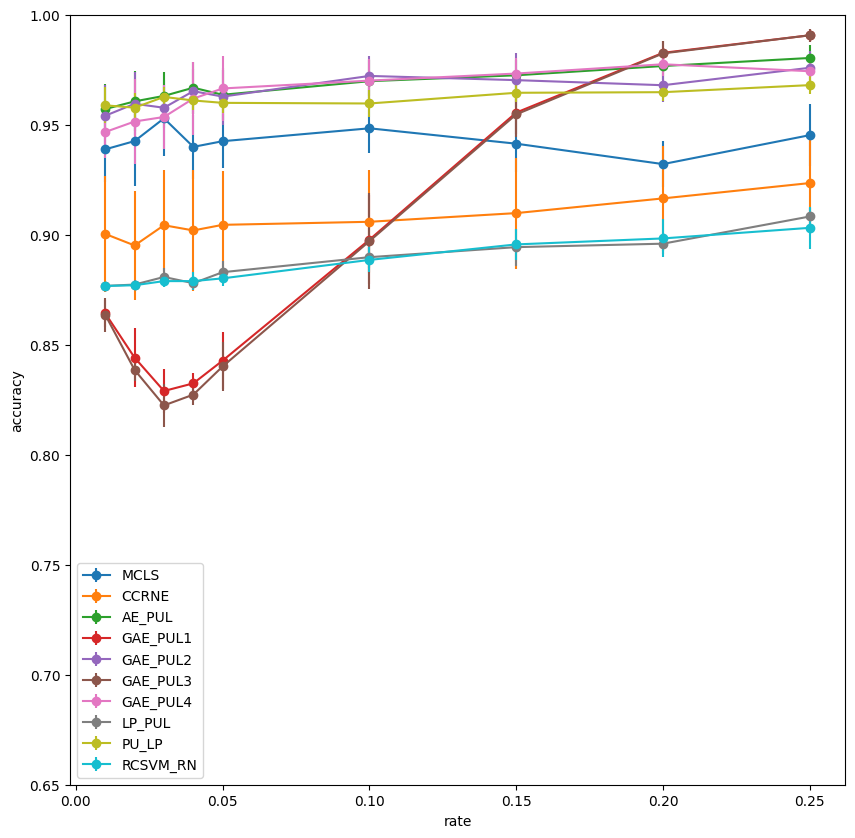

In [19]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'cora'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['f1']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['f1']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['f1']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['f1']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['f1']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['f1']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['f1']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['f1']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['f1']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['f1']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['f1_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['f1_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['f1_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['f1_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['f1_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['f1_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['f1_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['f1_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['f1_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['f1_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.65,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.legend()

# Mostrar o gráfico
plt.show()



In [20]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'cora'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.65,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.legend()

# Mostrar o gráfico
plt.show()



KeyError: 'df_acc'

In [ ]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'citeseer'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.65,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.title(dataset_plot)
plt.legend()

# Mostrar o gráfico
plt.show()



In [ ]:
# criar um gráfico para cada um dos conjuntos de dados, cada algoritmo representa uma linha do gráfico, o desvio padrão deve aparecer.

# Suponha que você tenha um DataFrame com as colunas "coluna1" e "coluna2"

dataset_plot = 'ionosphere'
# Extrair os dados das colunas
x = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['rate']
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['df_acc']
alg10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['df_acc']

e1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == dataset_plot)]['acc_std']
e2 = final_df[(final_df['algoritmo'] == 'CCRNE') & (final_df['dataset'] == dataset_plot)]['acc_std']
e3 = final_df[(final_df['algoritmo'] == 'AE_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e4 = final_df[(final_df['algoritmo'] == 'GAE_PUL1') & (final_df['dataset'] == dataset_plot)]['acc_std']
e5 = final_df[(final_df['algoritmo'] == 'GAE_PUL2') & (final_df['dataset'] == dataset_plot)]['acc_std']
e6 = final_df[(final_df['algoritmo'] == 'GAE_PUL3') & (final_df['dataset'] == dataset_plot)]['acc_std']
e7 = final_df[(final_df['algoritmo'] == 'GAE_PUL4') & (final_df['dataset'] == dataset_plot)]['acc_std']
e8 = final_df[(final_df['algoritmo'] == 'PU_LP') & (final_df['dataset'] == dataset_plot)]['acc_std']
e9 = final_df[(final_df['algoritmo'] == 'LP_PUL') & (final_df['dataset'] == dataset_plot)]['acc_std']
e10 = final_df[(final_df['algoritmo'] == 'RCSVM_RN') & (final_df['dataset'] == dataset_plot)]['acc_std']


plt.figure(figsize=(10, 10))
plt.ylim(0.3,1)
# Plotar as duas linhas usando o Matplotlib
plt.errorbar(x, alg1, e1, label='MCLS', fmt='-o')
plt.errorbar(x, alg2, e2, label='CCRNE', fmt='-o')
plt.errorbar(x, alg3, e3, label='AE_PUL', fmt='-o')
plt.errorbar(x, alg4, e4, label='GAE_PUL1', fmt='-o')
plt.errorbar(x, alg5, e5, label='GAE_PUL2', fmt='-o')
plt.errorbar(x, alg6, e6, label='GAE_PUL3', fmt='-o')
plt.errorbar(x, alg7, e7, label='GAE_PUL4', fmt='-o')
plt.errorbar(x, alg8, e8, label='LP_PUL', fmt='-o')
plt.errorbar(x, alg9, e9, label='PU_LP', fmt='-o')
plt.errorbar(x, alg10, e10, label='RCSVM_RN', fmt='-o')



# Adicionar rótulos aos eixos e uma legenda
plt.xlabel('rate')
plt.ylabel('accuracy')
plt.title(dataset_plot)
plt.legend()

# Mostrar o gráfico
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha um DataFrame com as colunas "x", "y1", "y2" e "y3" (ou mais)
data = {'x': [1, 2, 3, 4, 5],
        'y1': [5, 4, 3, 2, 1],
        'y2': [4, 3, 2, 1, 5],
        'y3': [3, 2, 1, 5, 4]}

# Crie um DataFrame com os desvios padrão correspondentes para cada conjunto de dados Y
data_std = {'y1': [0.2, 0.3, 0.2, 0.4, 0.1],
            'y2': [0.1, 0.2, 0.1, 0.3, 0.2],
            'y3': [0.3, 0.2, 0.4, 0.1, 0.3]}

df = pd.DataFrame(data)
df_std = pd.DataFrame(data_std)

# Extrair os dados das colunas
x = df['x']
y_columns = ['y1', 'y2', 'y3']  # Inclua todos os nomes das colunas de Y que você deseja plotar
desvio_padrao = df_std[y_columns]

# Criar um gráfico de barras de erro empilhadas
fig, ax = plt.subplots()
width = 0.35  # Largura das barras

bottom = np.zeros(len(x))  # Inicializa o fundo das barras empilhadas

for y_col in y_columns:
    y = df[y_col]
    ax.bar(x, y, width, yerr=desvio_padrao[y_col], label=y_col, bottom=bottom, capsize=5)
    bottom += y  # Atualiza o fundo para a próxima série

# Adicionar rótulos aos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()


In [ ]:
alg1 = final_df[(final_df['algoritmo'] == 'MCLS') & (final_df['dataset'] == 'cora')]['df_acc']
alg1

In [ ]:
slice = df_dict['citeseer'][(df_dict['citeseer']['Algoritmo'] == 'MCLS') & (df_dict['citeseer']['Rate'] == 0.01)]
dict_aux = dict()
dict_aux['algoritmo'] = slice.iloc[0,0]
dict_aux['rate'] = rate
dict_aux['acc'] = slice['acc'].mean()
dict_aux['acc_std'] = slice['acc'].std()
dict_aux['f1'] = slice['f1'].mean()
dict_aux['f1_std'] = slice['f1'].std()

In [ ]:
dict_aux

In [ ]:
df_2 = df1[(df1['coluna1'] == 'valor1')]

In [ ]:
# NN models

df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_NN.csv')
algorithms = ['AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3', 'GAE_PUL4']
AE_results_acc = list()
GAE1_results_acc = list()
GAE2_results_acc = list()
GAE3_results_acc = list()
GAE4_results_acc = list()

AE_results_f1 = list()
GAE1_results_f1 = list()
GAE2_results_f1 = list()
GAE3_results_f1 = list()
GAE4_results_f1 = list()

for rate in rates:
    for algorithm in algorithms:
        acc_df = df[(df['Rate'] == rate) & (df['Algoritmo'] == algorithm)]
        media_acc = acc_df['acc'].mean()
        
        if algorithm == 'AE_PUL':
            AE_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL1':
            GAE1_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL2':
            GAE2_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL3':
            GAE3_results_acc.append(media_acc)
        if algorithm == 'GAE_PUL4':
            GAE4_results_acc.append(media_acc)

for rate in rates:
    for algorithm in algorithms:
        acc_df = df[(df['Rate'] == rate) & (df['Algoritmo'] == algorithm)]
        media_f1 = acc_df['f1'].mean()
        
        if algorithm == 'AE_PUL':
            AE_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL1':
            GAE1_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL2':
            GAE2_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL3':
            GAE3_results_f1.append(media_f1)
        if algorithm == 'GAE_PUL4':
            GAE4_results_f1.append(media_f1)

In [ ]:
# CCRNE
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_CCRNE.csv')
CCRNE_results_acc = list()
CCRNE_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        CCRNE_results_acc.append(media_acc)
        CCRNE_results_f1.append(media_f1)


In [ ]:
#lppul
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_LP_PUL.csv')
LP_PUL_results_acc = list()
LP_PUL_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        LP_PUL_results_acc.append(media_acc)
        LP_PUL_results_f1.append(media_f1)

In [ ]:
#mcls
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_MCLS.csv')
MCLS_results_acc = list()
MCLS_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        MCLS_results_acc.append(media_acc)
        MCLS_results_f1.append(media_f1)

In [ ]:
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_PU_LP.csv')
PU_LP_results_acc = list()
PU_LP_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        PU_LP_results_acc.append(media_acc)
        PU_LP_results_f1.append(media_f1)

In [ ]:
df = pd.read_csv(r'C:\Users\User\Desktop\Morzao\experimentos_pesquisa\experimentos_pesquisa\Resultados\cora\dataframe_cora_RCSVM_RN.csv')
RCSVM_RN_results_acc = list()
RCSVM_RN_results_f1 = list()

for rate in rates:
        acc_df = df[df['Rate'] == rate]
        media_f1 = acc_df['f1'].mean()
        media_acc = acc_df['acc'].mean()
        RCSVM_RN_results_acc.append(media_acc)
        RCSVM_RN_results_f1.append(media_f1)

In [ ]:
import matplotlib.pyplot as plt

acc_results = [CCRNE_results_acc, LP_PUL_results_acc, MCLS_results_acc,
               AE_results_acc, GAE1_results_acc, GAE2_results_acc, 
               GAE3_results_acc, GAE4_results_acc, PU_LP_results_acc,
               RCSVM_RN_results_acc]

# Sua lista de taxas (rate) com 10 elementos (substitua pelos seus próprios dados)

# Sua lista de rótulos (substitua pelos seus próprios rótulos)
algorithms = ['CCRNE', 'LP_PUL', 'MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3',
              'GAE_PUL4', 'PU_LP', 'RCSVM_RN']

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, 8))

# Iterar pelas listas de dados, rótulos e plotar cada uma como uma linha com rótulo
for i, lista in enumerate(acc_results):
    ax.plot(rates, lista, label=algorithms[i])

# Definir rótulos dos eixos e título do gráfico
ax.set_xlabel('Rate')
ax.set_ylabel('Valores')
ax.set_title('acc')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt

acc_results = [CCRNE_results_f1, LP_PUL_results_f1, MCLS_results_f1,
               AE_results_f1, GAE1_results_f1, GAE2_results_f1, 
               GAE3_results_f1, GAE4_results_f1, PU_LP_results_f1,
               RCSVM_RN_results_f1]

# Sua lista de taxas (rate) com 10 elementos (substitua pelos seus próprios dados)

# Sua lista de rótulos (substitua pelos seus próprios rótulos)
algorithms = ['CCRNE', 'LP_PUL', 'MCLS', 'AE_PUL', 'GAE_PUL1', 'GAE_PUL2', 'GAE_PUL3',
              'GAE_PUL4', 'PU_LP', 'RCSVM_RN']

# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, 8))

# Iterar pelas listas de dados, rótulos e plotar cada uma como uma linha com rótulo
for i, lista in enumerate(acc_results):
    ax.plot(rates, lista, label=algorithms[i])

# Definir rótulos dos eixos e título do gráfico
ax.set_xlabel('Rate')
ax.set_ylabel('Valores')
ax.set_title('f1')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


In [23]:
import numpy as np

# Create a matrix X with rows you want to normalize (replace this with your actual data)
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=float)

# Calculate the L2 norm (Euclidean norm) for each row
row_norms = np.linalg.norm(X, axis=1)

# Perform row-wise normalization
X_normalized = X / row_norms[:, np.newaxis]

# X_normalized now contains each row normalized individually


In [24]:
X_normalized

array([[0.26726124, 0.53452248, 0.80178373],
       [0.45584231, 0.56980288, 0.68376346],
       [0.50257071, 0.57436653, 0.64616234]])